# Personality Prediction System

#### We will import all the libraries required to carry out the project. After that we will load the dataset and perform basic operations to get an insight of the data

In [1]:
# Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import datasets, linear_model 
from sklearn import neighbors
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('train.csv')
data.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (Class label)
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively


In [3]:
# Rows and columns of the dataset
data.shape

(709, 8)

In [4]:
# Columns of the Dataset
data.columns

Index(['Gender', 'Age', 'openness', 'neuroticism', 'conscientiousness',
       'agreeableness', 'extraversion', 'Personality (Class label)'],
      dtype='object')

In [5]:
# Types of categories in Personality
data['Personality (Class label)'].unique()

array(['extraverted', 'serious', 'dependable', 'lively', 'responsible'],
      dtype=object)

In [6]:
# Studying the distribution of data
data["Gender"].value_counts()

Female    380
Male      328
5           1
Name: Gender, dtype: int64

In [7]:
data['Personality (Class label)'].value_counts()

serious        161
extraverted    150
dependable     138
lively         134
responsible    126
Name: Personality (Class label), dtype: int64

### Distribution of Age

<AxesSubplot:ylabel='None'>

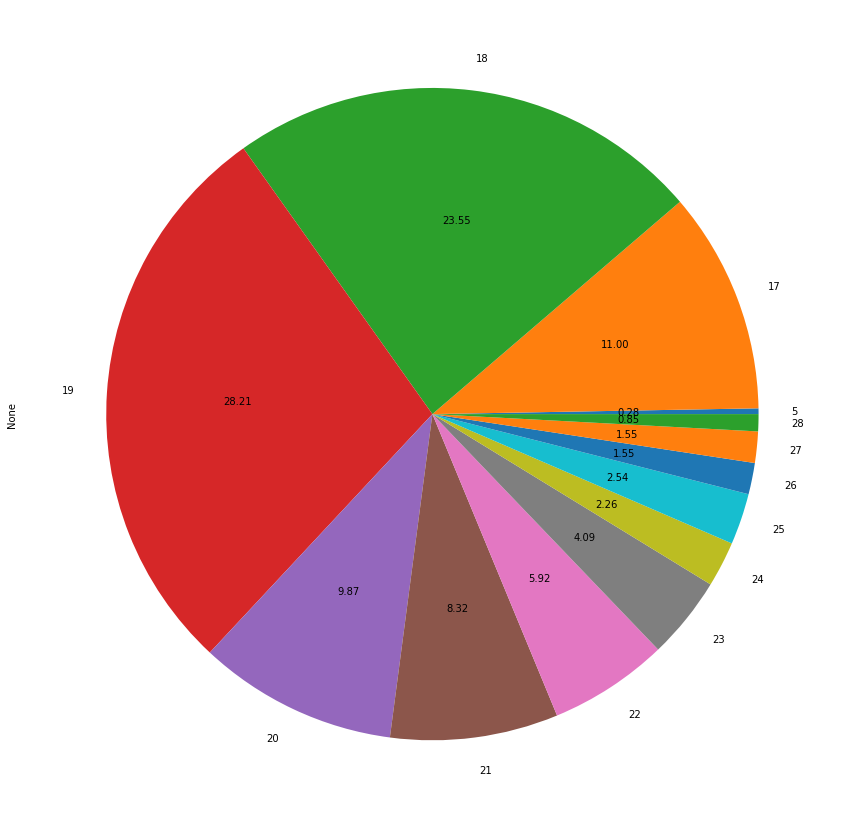

In [8]:
data.groupby('Age').size().plot(kind='pie', autopct='%.2f', figsize=(15,15))

In [9]:
data['Age'].value_counts()

19    200
18    167
17     78
20     70
21     59
22     42
23     29
25     18
24     16
27     11
26     11
28      6
5       2
Name: Age, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


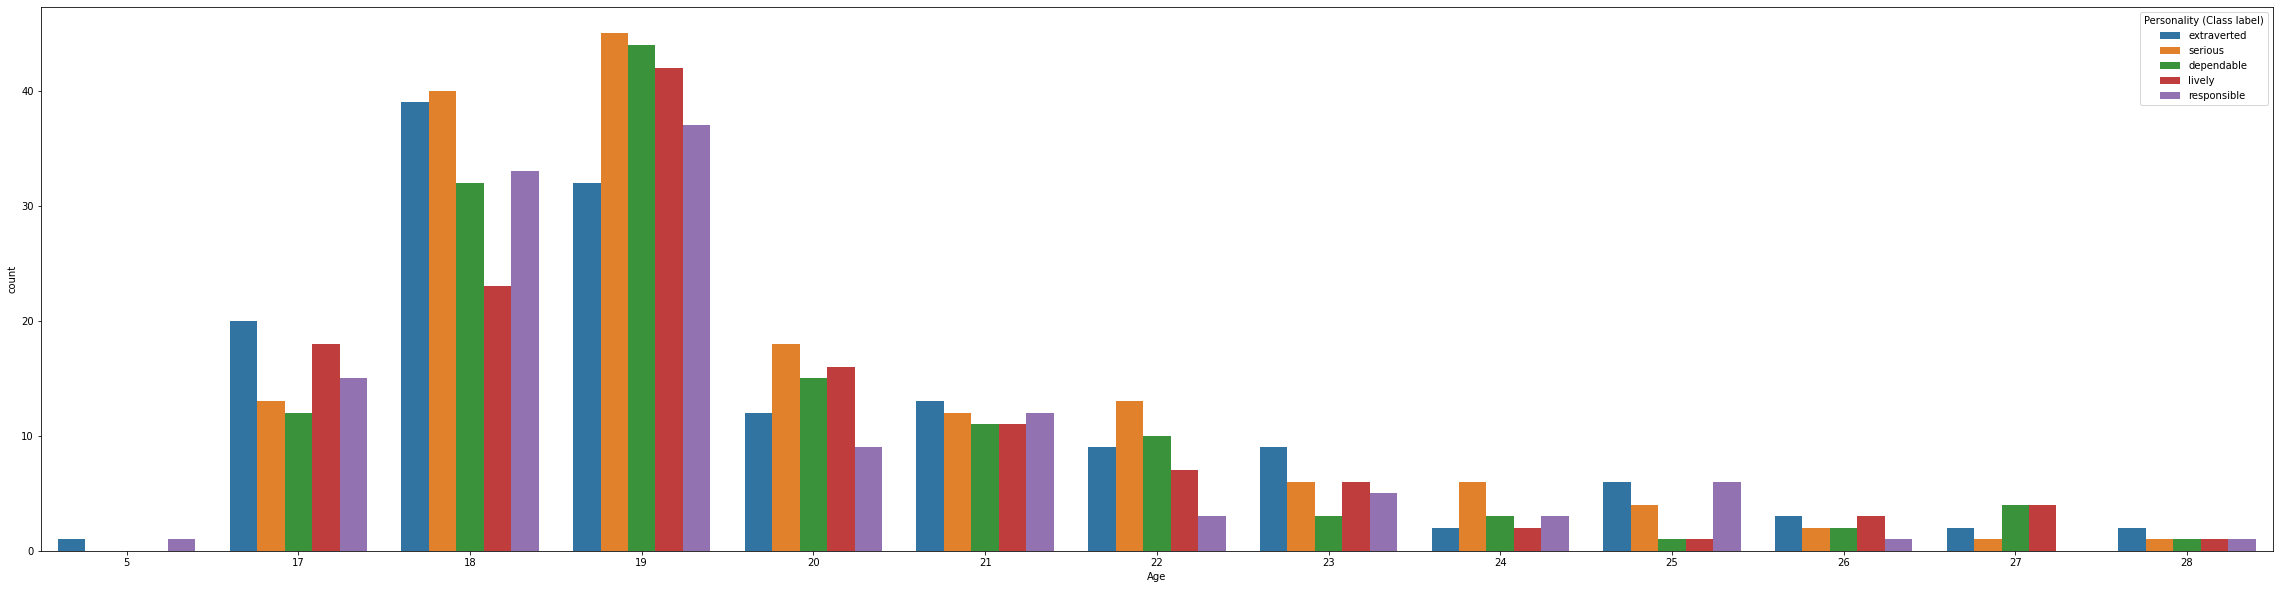

In [10]:
plt.figure(figsize=(40,10))
sns.countplot('Age',hue='Personality (Class label)',data=data)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


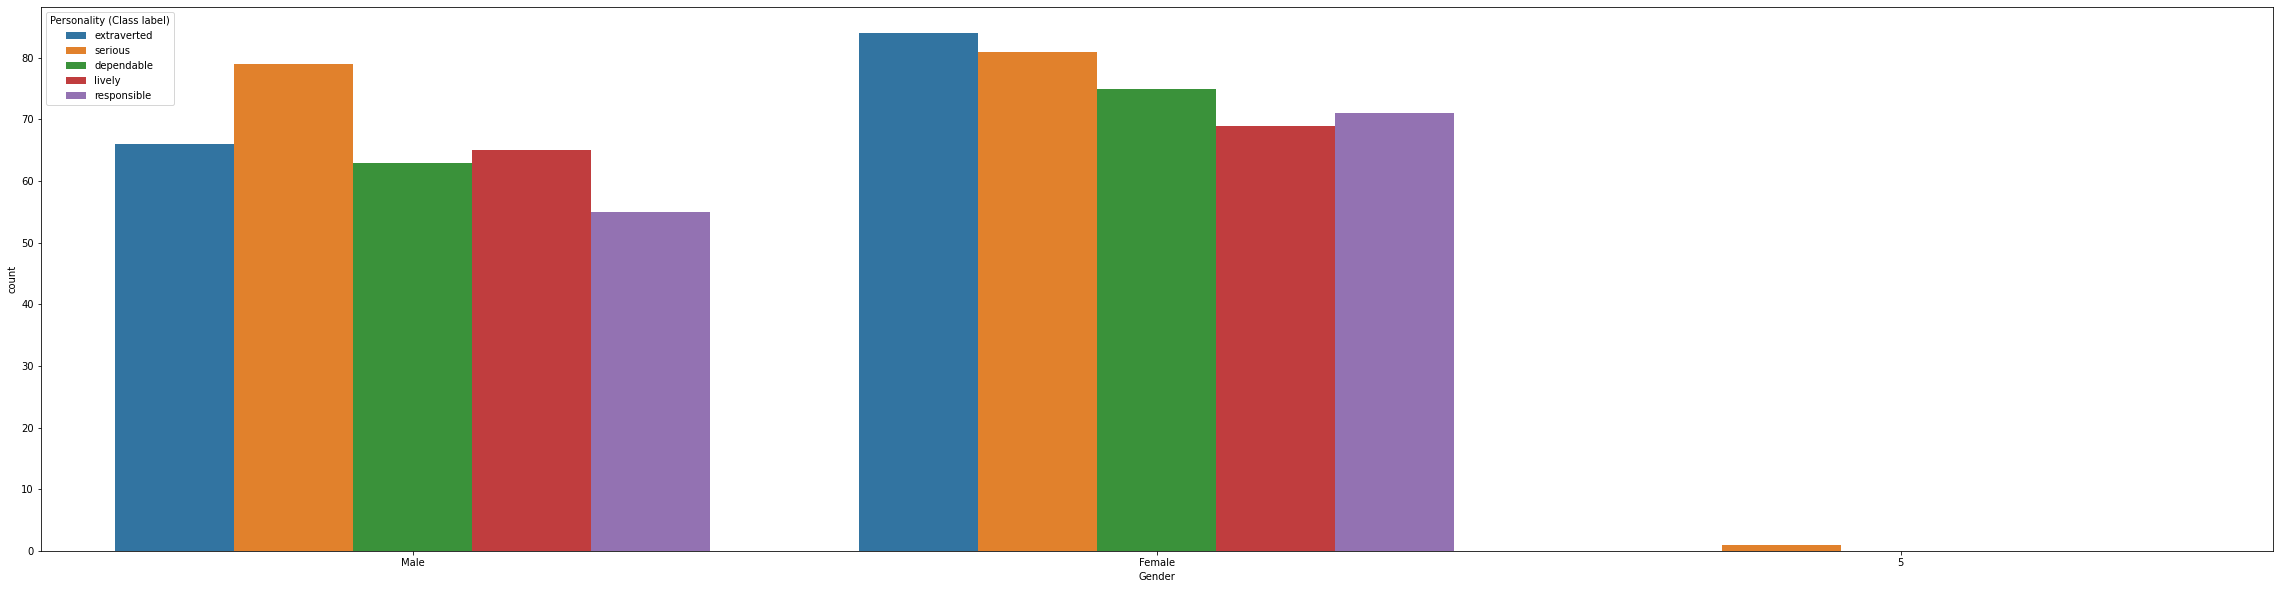

In [11]:
plt.figure(figsize=(40,10))
sns.countplot('Gender',hue='Personality (Class label)',data=data)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


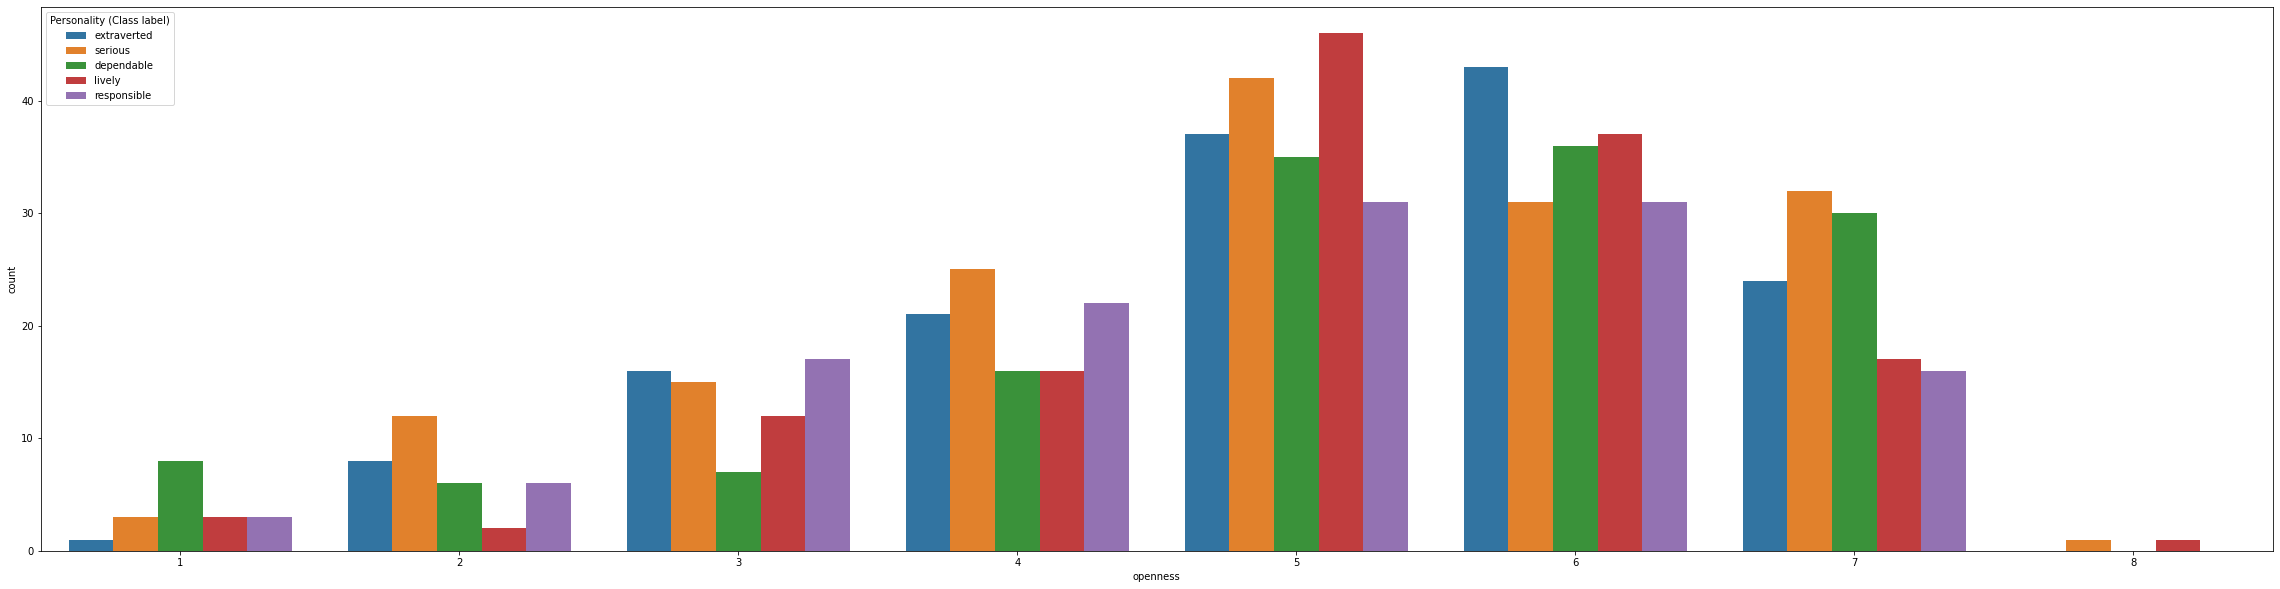

In [12]:
plt.figure(figsize=(40,10))
sns.countplot('openness',hue='Personality (Class label)',data=data)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


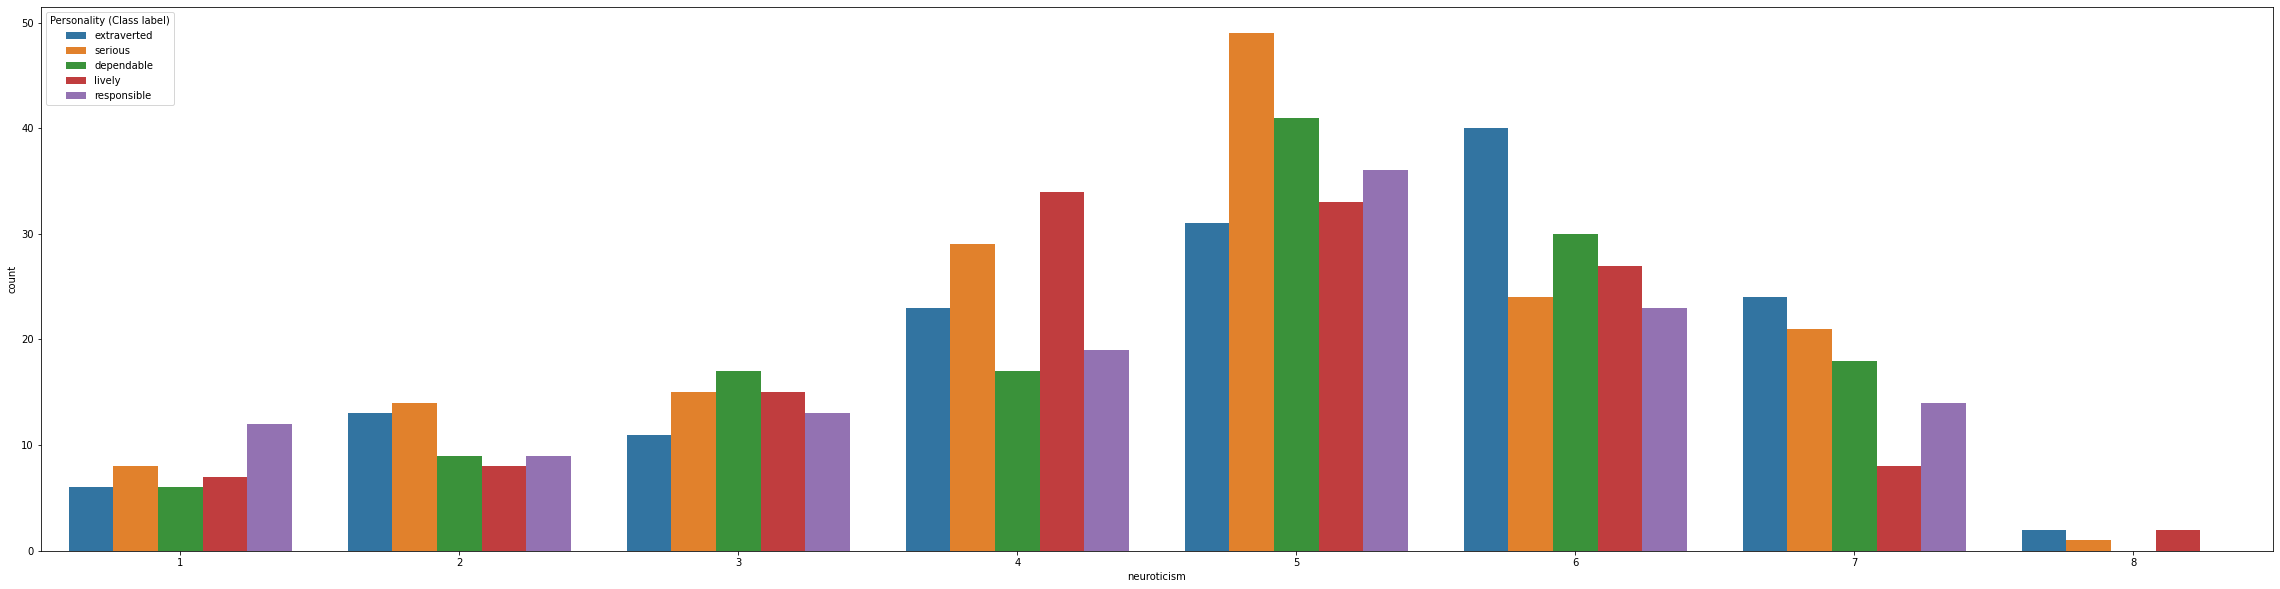

In [13]:
plt.figure(figsize=(40,10))
sns.countplot('neuroticism',hue='Personality (Class label)',data=data)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


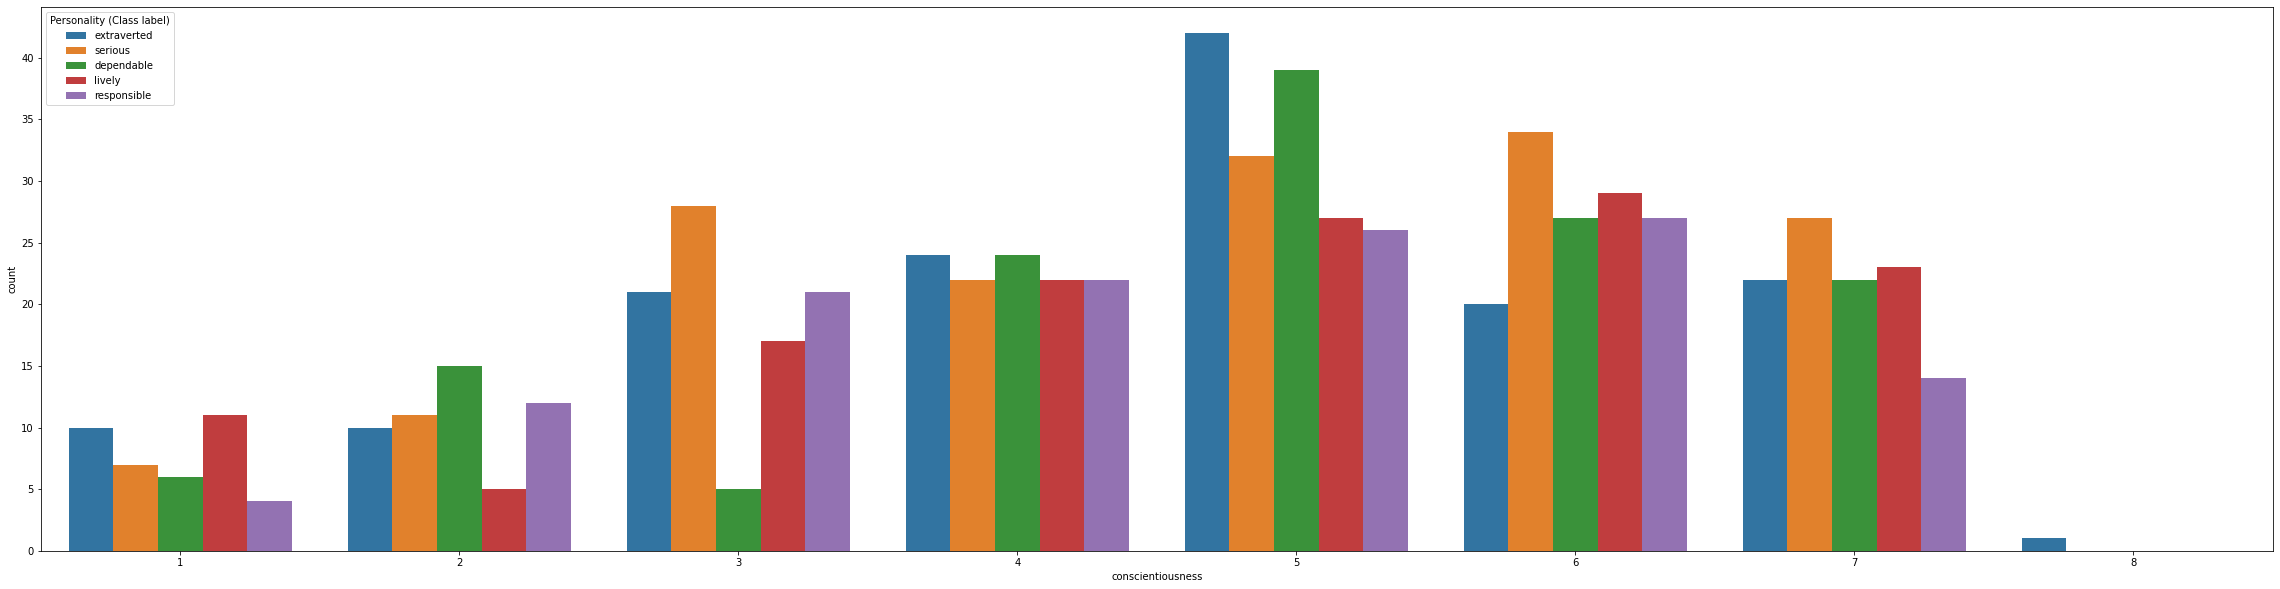

In [14]:
plt.figure(figsize=(40,10))
sns.countplot('conscientiousness',hue='Personality (Class label)',data=data)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


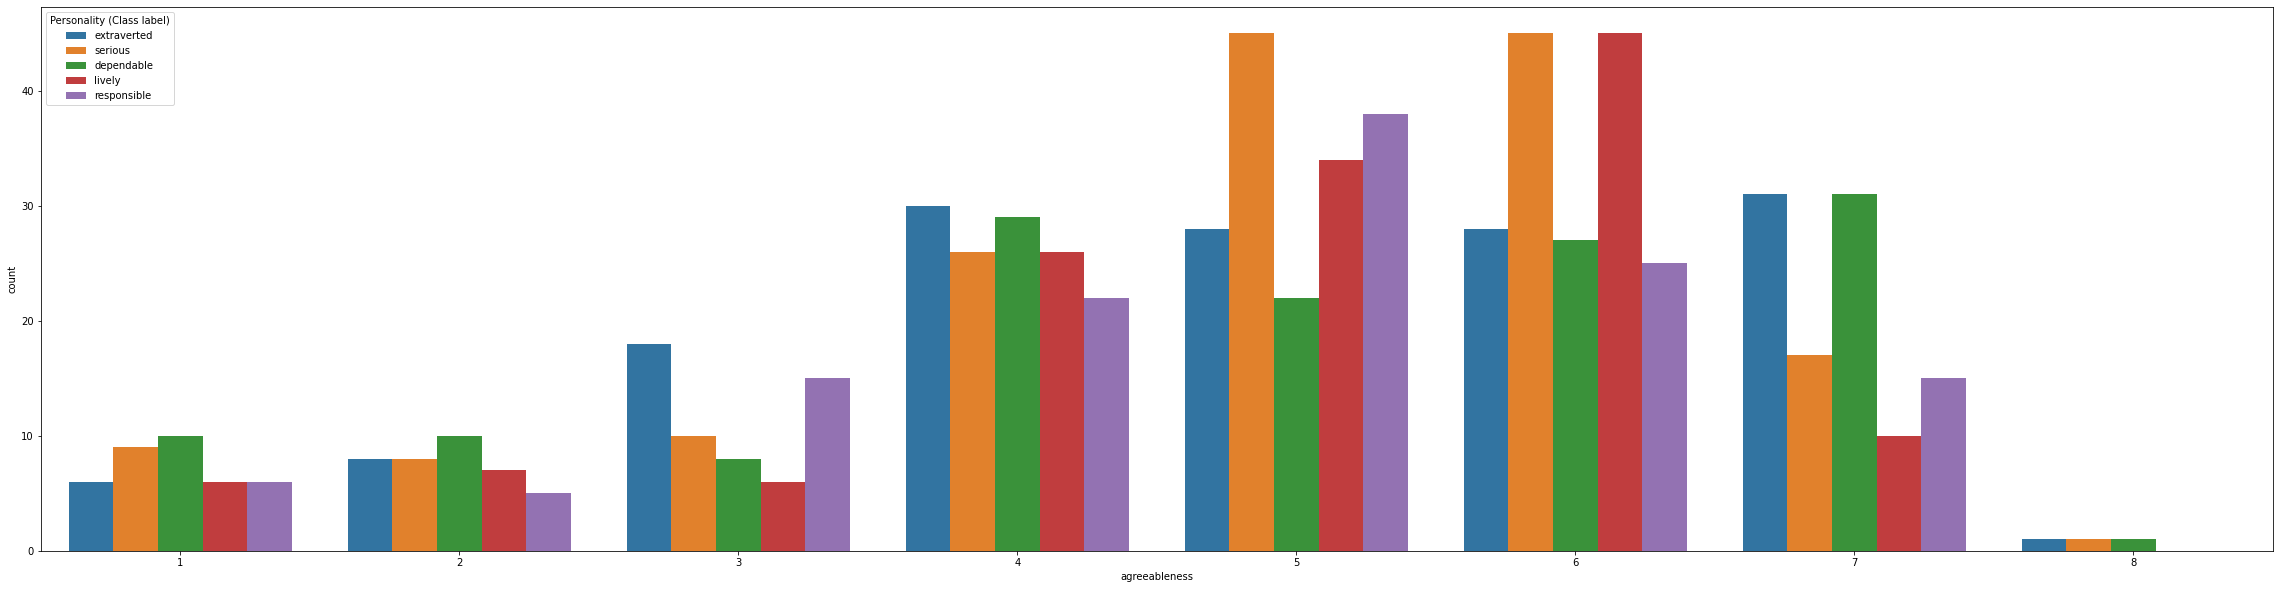

In [15]:
plt.figure(figsize=(40,10))
sns.countplot('agreeableness',hue='Personality (Class label)',data=data)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


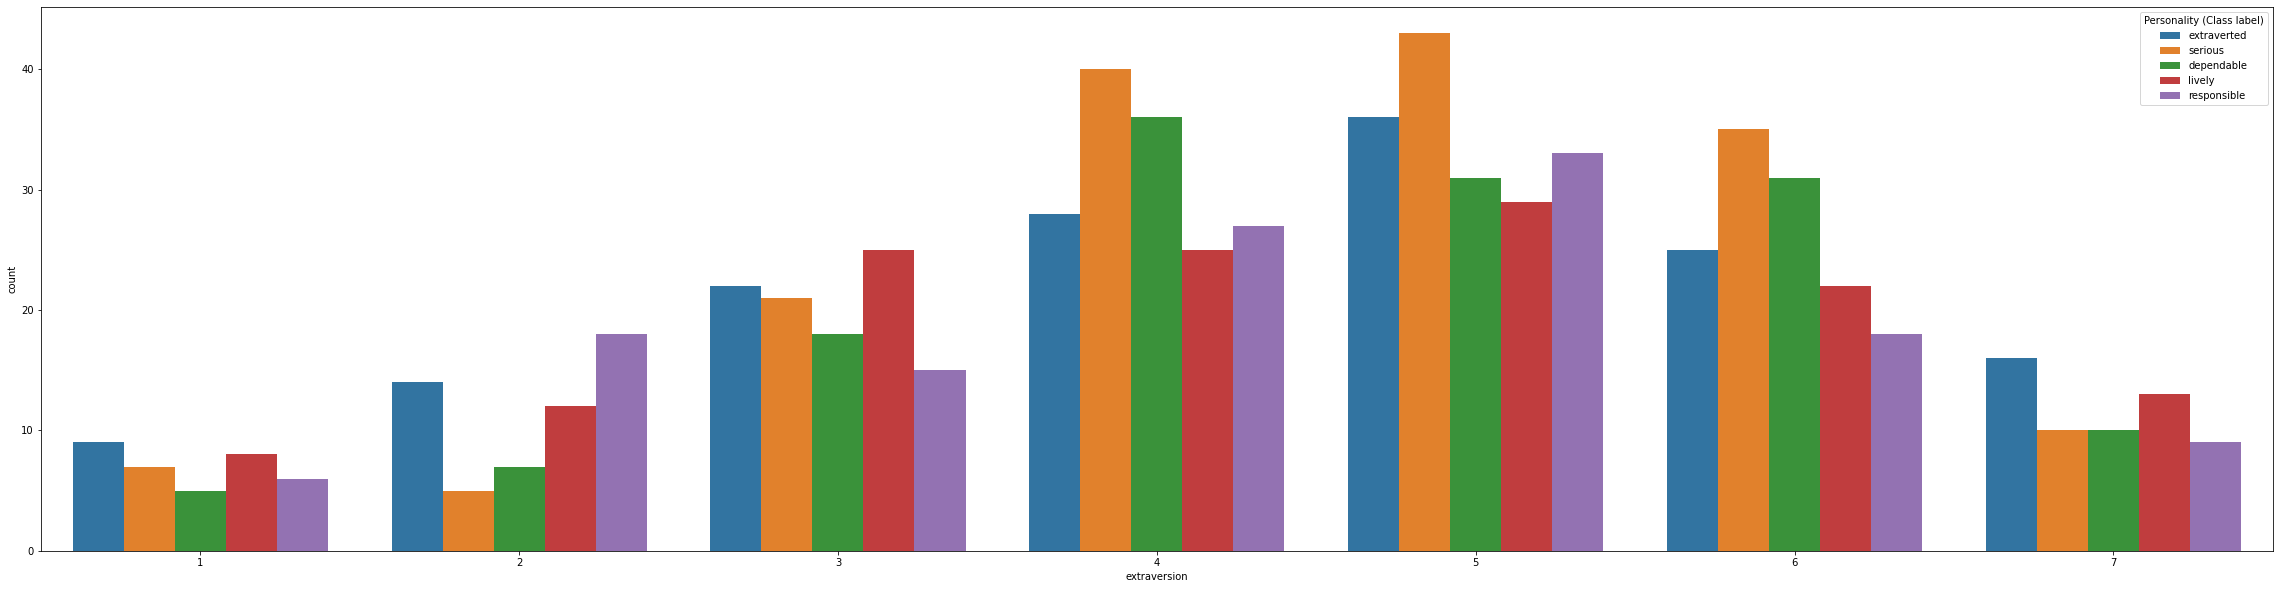

In [16]:
plt.figure(figsize=(40,10))
sns.countplot('extraversion',hue='Personality (Class label)',data=data)
plt.show()

#### Preparing the data 

In [17]:
array = data.values

# Converting the textual data to numerical form
for i in range(len(array)):
    if array[i][0] == 'Male':
        array[i][0] = 1
    else:
        array[i][0] = 0

In [18]:
df = pd.DataFrame(array)

# Obtaining the features
maindf = df.drop([7], axis=1)

# Converting feature DataFrame to an Array
mainarray = maindf.values

# Feature vector
print(mainarray)

[[1 17 7 ... 7 3 2]
 [1 19 4 ... 4 6 6]
 [0 18 7 ... 4 5 5]
 ...
 [1 22 5 ... 3 6 1]
 [1 19 5 ... 5 7 5]
 [0 18 5 ... 7 6 5]]


In [19]:
# Target dataframe
target = df[7]

# Covnverting Feature Dataframe to an array
train_y = target.values

# Target vector
train_y

array(['extraverted', 'serious', 'dependable', 'extraverted', 'lively',
       'lively', 'extraverted', 'extraverted', 'dependable', 'lively',
       'serious', 'extraverted', 'lively', 'dependable', 'responsible',
       'extraverted', 'serious', 'dependable', 'responsible',
       'extraverted', 'responsible', 'extraverted', 'responsible',
       'serious', 'serious', 'dependable', 'extraverted', 'extraverted',
       'lively', 'lively', 'extraverted', 'extraverted', 'dependable',
       'lively', 'serious', 'lively', 'responsible', 'responsible',
       'dependable', 'serious', 'dependable', 'extraverted', 'serious',
       'extraverted', 'dependable', 'dependable', 'responsible',
       'serious', 'lively', 'lively', 'extraverted', 'extraverted',
       'serious', 'extraverted', 'lively', 'lively', 'extraverted',
       'dependable', 'lively', 'lively', 'responsible', 'extraverted',
       'responsible', 'dependable', 'serious', 'serious', 'responsible',
       'dependable', 'respo

In [20]:
for i in range(len(train_y)):
    train_y[i] = str(train_y[i])
    

### Training the Logistic Regression Model to classify multiple 

In [21]:
Logistic_model = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg',max_iter =1000)
Logistic_model.fit(mainarray, train_y)

LogisticRegression(max_iter=1000, multi_class='multinomial', solver='newton-cg')

### Testing for test data


In [22]:
testdata = pd.read_csv('test.csv')
testdata.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (class label)
0,Female,20,7,9,9,5,5,dependable
1,Male,17,5,4,5,2,4,serious
2,Female,25,5,5,7,2,4,serious
3,Female,18,6,2,7,4,7,serious
4,Female,19,2,4,7,1,3,responsible


In [23]:
test = testdata.values
test

array([['Female', 20, 7, ..., 5, 5, 'dependable'],
       ['Male', 17, 5, ..., 2, 4, 'serious'],
       ['Female', 25, 5, ..., 2, 4, 'serious'],
       ...,
       ['Male', 18, 7, ..., 2, 7, 'serious'],
       ['Male', 23, 6, ..., 4, 3, 'extraverted'],
       ['Female', 18, 5, ..., 5, 6, 'extraverted']], dtype=object)

In [24]:
for i in range(len(test)):
    if test[i][0] == 'Male':
        test[i][0] = 1
    else:
        test[i][0] = 0

In [25]:
testdata.shape

(315, 8)

In [26]:
testdata = testdata.rename({
          "Personality (class label)":"Personality"
        }, axis='columns')

In [27]:
test_y = testdata["Personality"]
test_y

0       dependable
1          serious
2          serious
3          serious
4      responsible
          ...     
310    extraverted
311     dependable
312        serious
313    extraverted
314    extraverted
Name: Personality, Length: 315, dtype: object

In [28]:
df1 = pd.DataFrame(test)
testdf = df1.drop([7], axis=1)
maintestarray = testdf.values
maintestarray

array([[0, 20, 7, ..., 9, 5, 5],
       [1, 17, 5, ..., 5, 2, 4],
       [0, 25, 5, ..., 7, 2, 4],
       ...,
       [1, 18, 7, ..., 6, 2, 7],
       [1, 23, 6, ..., 5, 4, 3],
       [0, 18, 5, ..., 3, 5, 6]], dtype=object)

### Prediction on the test data

In [29]:
y_prediction = Logistic_model.predict(maintestarray)

In [30]:
# Checking the accuracy of the model
from sklearn import metrics
print("The accuracy score of the model is : ", metrics.accuracy_score(y_prediction, test_y))

The accuracy score of the model is :  0.8571428571428571
